<a href="https://colab.research.google.com/github/shekhs/VGG_/blob/main/FSDS_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**VGG 16**

##**VERY DEEP CONVOLUTIONAL NETWORKS**
FOR
LARGE-SCALE
IMAGE
RECOGNITION

[Paper](https://arxiv.org/pdf/1409.1556.pdf)

## What is VGG?
VGG stands for Visual Geometry Group; it is a standard deep Convolutional Neural Network (CNN) architecture with multiple layers. The “deep” refers to the number of layers with VGG-16 or VGG-19 consisting of 16 and 19 convolutional layers.

## The main idea:

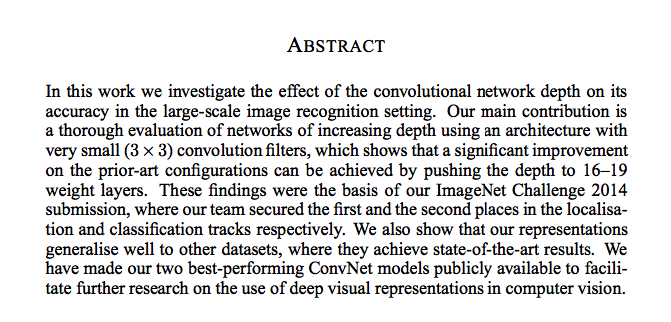

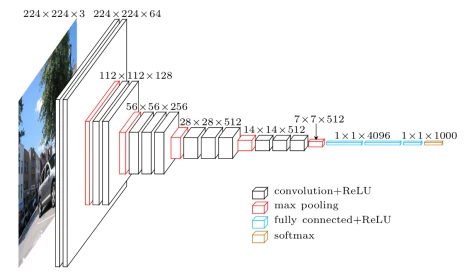

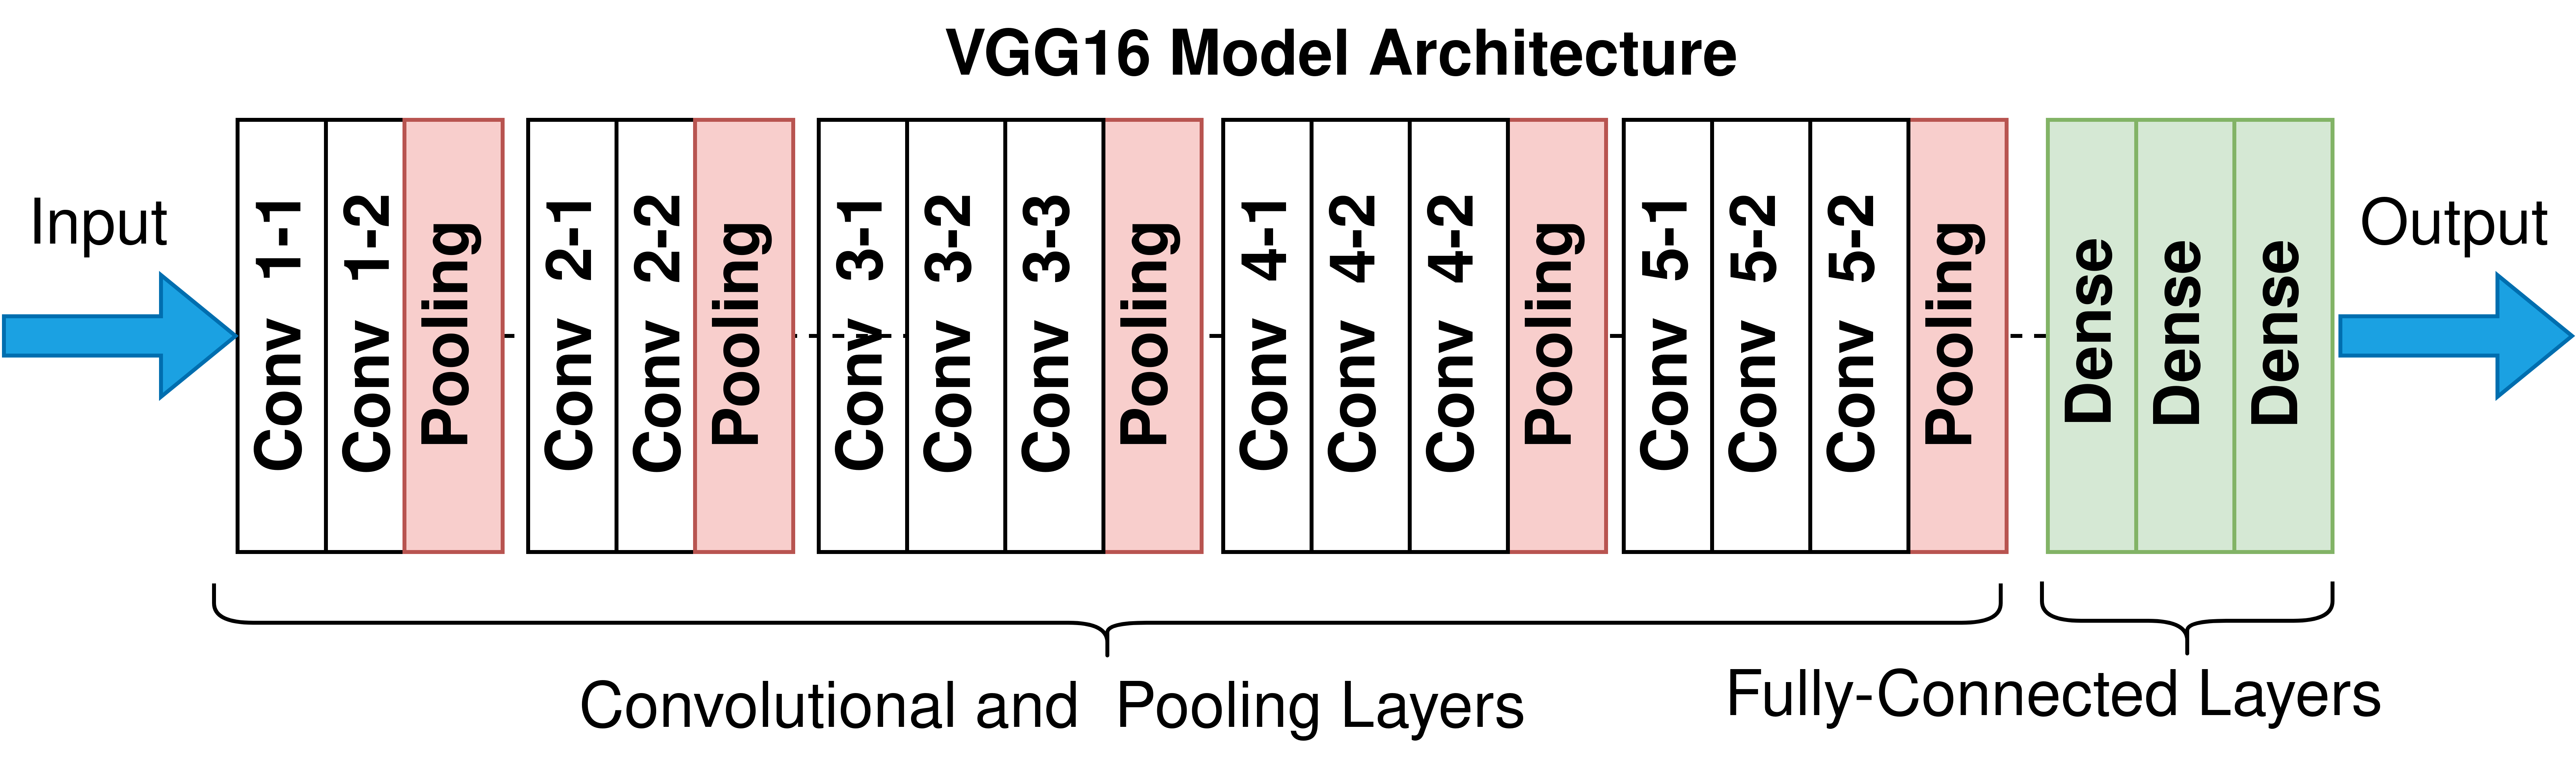

The number 16 in the name VGG refers to the fact that it is 16 layers deep neural network (VGGnet). This means that VGG16 is a pretty extensive network and has a total of around 138 million parameters. Even according to modern standards, it is a huge network. However, VGGNet16 architecture’s simplicity is what makes the network more appealing. Just by looking at its architecture, it can be said that it is quite uniform.

There are a few convolution layers followed by a pooling layer that reduces the height and the width. If we look at the number of filters that we can use, around 64 filters are available that we can double to about 128 and then to 256 filters. In the last layers, we can use 512 filters.

##**Complexity and challenges**
The number of filters that we can use doubles on every step or through every stack of the convolution layer. This is a major principle used to design the architecture of the VGG16 network. One of the crucial downsides of the VGG16 network is that it is a huge network, which means that it takes more time to train its parameters.

Because of its depth and number of fully connected layers, the VGG16 model is more than 533MB. This makes implementing a VGG network a time-consuming task.

The VGG16 model is used in several deep learning image classification problems, but smaller network architectures such as GoogLeNet and SqueezeNet are often preferable. In any case, the VGGNet is a great building block for learning purposes as it is straightforward to implement.



##**Performance of VGG Models**
VGG16 highly surpasses the previous versions of models in the ILSVRC-2012 and ILSVRC-2013 competitions. Moreover, the VGG16 result is competing for the classification task winner (GoogLeNet with 6.7% error) and considerably outperforms the ILSVRC-2013 winning submission Clarifai. It obtained 11.2% with external training data and around 11.7% without it. In terms of the single-net performance, the VGGNet-16 model achieves the best result with about 7.0% test error, thereby surpassing a single GoogLeNet by around 0.9%.



#Code Implementation Of VGG 16

In [13]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2022-09-01 08:24:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   316MB/s    in 0.2s    

2022-09-01 08:24:54 (316 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [14]:
! unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [15]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam
import numpy as np

In [16]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="cats_and_dogs_filtered/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="cats_and_dogs_filtered/validation", target_size=(224,224))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:

#Convolutional Layer

model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


#Fully Connected Layer

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))


model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# model.summary()

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0.1, patience=5, verbose=1, mode='auto')


H = model.fit_generator(steps_per_epoch=10,generator=traindata, validation_data= testdata, validation_steps=10,epochs=10,callbacks=[checkpoint,early])


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


10/10 [==============================] - ETA: 0s - loss: 0.6942 - accuracy: 0.4507
Epoch 1: val_accuracy improved from -inf to 0.52812, saving model to vgg16.hdf5
10/10 [==============================] - 12s 1s/step - loss: 0.6942 - accuracy: 0.4507 - val_loss: 0.6928 - val_accuracy: 0.5281
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.4094
Epoch 2: val_accuracy did not improve from 0.52812
10/10 [==============================] - 6s 628ms/step - loss: 0.6941 - accuracy: 0.4094 - val_loss: 0.6932 - val_accuracy: 0.4969
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4812
Epoch 3: val_accuracy did not improve from 0.52812
10/10 [==============================] - 6s 642ms/step - loss: 0.6932 - accuracy: 0.4812 - val_loss: 0.6932 - val_accuracy: 0.4875
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.4906
Epoch 4: val_accuracy did not improve from 0.52812
10/10 [====

dog


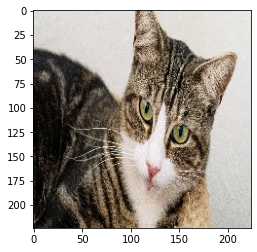

In [27]:
import matplotlib.pyplot as plt


from keras.preprocessing import image
img = image.load_img("cat.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16.hdf5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("dog")
else:
    print('cat')

In [28]:
output

array([[0.50357544, 0.49642453]], dtype=float32)

In [ ]:
!nvidia-smi